In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("1-studyhours.csv")

In [4]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [6]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


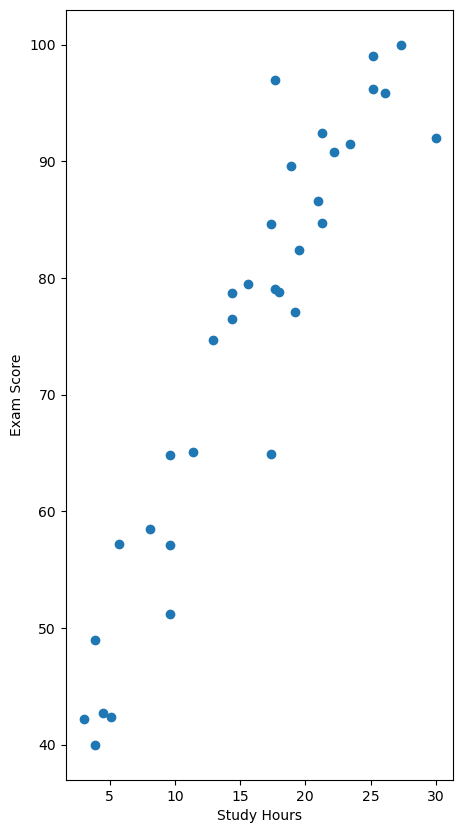

In [11]:
plt.figure(figsize=(5,10))
plt.scatter(x="Study Hours",y="Exam Score",data=df)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

## 📘 train_test_split Parameters Cheat Sheet

The function `train_test_split(X, y, ...)` splits your data into two phases: **Learning** and **Testing**.

| Parameter | Type | Example | What it does (Simple English) |
| :--- | :--- | :--- | :--- |
| **`arrays`** | Sequences | `X, y` | The data you want to split. Usually Features (`X`) and Target (`y`). |
| **`test_size`** | Float | `0.2` | **The size of the "Exam".** <br> `0.2` means 20% of data is for testing, 80% is for training. |
| **`random_state`** | Int | `42` | **The "Save Game" button.** <br> It locks the randomness. If you use `42` today and tomorrow, you get the exact same split. |
| **`shuffle`** | Bool | `True` | **Shuffling the cards.** <br> Mixes the rows randomly before splitting. (Default is `True`). |
| **`stratify`** | Array | `y` | **The "Fairness" Guard.** <br> Ensures the Training and Test sets have the same percentage of categories (e.g., 50% Yes / 50% No). |

In [19]:
#independet and dependent features
X=df[["Study Hours"]]
y = df["Exam Score"]
#burada X yani Features (X) traain ediceğimiz vrerişer df olarak verilir çünkü genelde birden fazla features veririrz
#ama y yani predict ediceğimiz target series olarak verrilri çünkü genelde tek bir değer predict edilir örn fiyat gibi 

In [20]:
type(X)

pandas.core.frame.DataFrame

In [21]:
type(y)

pandas.core.series.Series

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [25]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [26]:
X_test

,Study Hours
25,5.1
14,21.0
30,23.4
16,5.7
24,9.6
20,3.9
19,21.3


## ✂️ Visualizing Train-Test Split (Logic Breakdown)

**The Code:**
`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)`

**The Scenario:**
Imagine a dataset of **5 Students**.
* **Total Data:** 5 Rows.
* **Split:** 80% Train (4 rows) / 20% Test (1 row).
* **Random Seed:** `15` (This specific number shuffles the data in a specific way).

---

### 1. Before the Split (Original Data)
| Index | Student (X) | Hours (X) | Score (y) |
| :--- | :--- | :--- | :--- |
| 0 | Ali | 2 | 50 |
| 1 | Burak | 4 | 70 |
| 2 | Can | 6 | 85 |
| 3 | Deniz | 8 | 90 |
| 4 | Elif | 10 | 95 |

---

### 2. After the Split (`random_state=15`)

Python shuffles the indices using seed `15`. In this specific case, index `1` (Burak) is selected for the Test Set.

#### 🎓 A. Training Set (`X_train`, `y_train`)
*The "Classroom". The model sees these rows and learns the pattern.*

| Index | Student | Hours | Score |
| :--- | :--- | :--- | :--- |
| 2 | Can | 6 | 85 |
| 0 | Ali | 2 | 50 |
| 3 | Deniz | 8 | 90 |
| 4 | Elif | 10 | 95 |

#### 📝 B. Test Set (`X_test`, `y_test`)
*The "Exam". We hide the Score (`y_test`) and ask the model to predict it using `X_test`.*

| Index | Student | Hours | Score |
| :--- | :--- | :--- | :--- |
| **1** | **Burak** | **4** | **70** |

---

### 🔑 Key Vocabulary
* **`X_train`**: The study material (Features for learning).
* **`y_train`**: The study answers (Target for learning).
* **`X_test`**: The exam question (Features for testing).
* **`y_test`**: The answer key (Target to check accuracy).

# 🧪 Feature Scaling: The Ultimate Guide
### (Normalization vs. Standardization)

In Machine Learning, **Feature Scaling** is the process of putting different features on the same scale.
> **Why?** If `Salary` ranges from 20,000 to 100,000 and `Age` ranges from 0 to 100, the model will think `Salary` is 1,000x more important. Scaling fixes this bias.

---

## 1. 📏 Normalization (Min-Max Scaling)

**Concept:** "The Squashing Technique"
It shifts and rescales the data so that they end up ranging between **0 and 1**.

* **Formula:**
    $$X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

* **Visual Logic:**
    It suppresses the data into a fixed box. The smallest value becomes 0, the largest becomes 1.

* **When to use:**
    * **Image Processing:** Pixels are 0-255, we need them 0-1.
    * **Neural Networks:** Deep Learning weights prefer small inputs (0-1).
    * **Algorithms:** K-Nearest Neighbors (KNN), Neural Nets.

* **⚠️ Weakness:**
    * **Highly sensitive to Outliers.** If you have one huge outlier, all your normal data gets squashed into a tiny range (e.g., 0.0001 to 0.0002).

---

## 2. 🎯 Standardization (Z-Score Scaling)

**Concept:** "The Centering Technique"
It centers the data around 0 (Mean) and scales it based on the variance (Standard Deviation).

* **Formula:**
    $$z = \frac{x - \mu}{\sigma}$$
    *(Where $\mu$ is the Mean and $\sigma$ is the Standard Deviation)*

* **Visual Logic:**
    It doesn't force data into a box. It just moves the center to 0. Most values land between -3 and +3, but they are *not* capped.

* **When to use:**
    * **Most Machine Learning models:** Linear Regression, Logistic Regression, SVM.
    * When your data follows a **Gaussian (Bell Curve)** distribution.
    * When you have **Outliers** (it handles them better than Normalization).

---

## 🆚 Comparison Table (Cheat Sheet)

| Feature | Min-Max Normalization | Standardization (Z-Score) |
| :--- | :--- | :--- |
| **Python Library** | `sklearn.preprocessing.MinMaxScaler` | `sklearn.preprocessing.StandardScaler` |
| **Range** | Fixed **[0, 1]** | No fixed range (typ. **-3 to +3**) |
| **Mean** | Varies | Always **0** |
| **Outlier Handling** | ❌ Terrible (Squashes data) | ✅ Good (Robust) |
| **Best For** | Images, Neural Networks | Regression, SVM, Clustering |

---

## 🚨 THE GOLDEN RULE (Interview Critical) 🚨

**NEVER fit the scaler on your Test Data.**

If you do `scaler.fit(X_test)`, you are calculating the Mean/Max of the *future* data. This is **Cheating** (Data Leakage). The model must not know anything about the test set logic.

### ✅ Correct Implementation:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 1. Learn from Train, Apply to Train
X_train_scaled = scaler.fit_transform(X_train) 

# 2. Apply the SAME logic to Test (Do NOT fit again)
X_test_scaled = scaler.transform(X_test)

In [32]:
#standartize the data set
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

In [33]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## 🚫 Data Leakage: Why Order Matters?

**The Concept:**
Data Leakage happens when information from the **Test Set** (The Future) accidentally "leaks" into the **Training Process** (The Past).

It is not about mixing the rows physically. It is about mixing the **Statistics (Mean, Variance, Min/Max)**.

---

### ❌ The Wrong Way (Leakage!)
*Logic: "Calculate the average of the WHOLE CLASS before the exam."*

1.  **Scale Everything:** `scaler.fit_transform(All_Data)`
    * *Problem:* The Mean ($\mu$) now includes values from the Test Set.
2.  **Split:** Train / Test
3.  **Result:** Your model learns patterns based on an "Average" that it shouldn't know yet.
    * **Outcome:** High Accuracy in Training, **Failure in Real Life.**

---

### ✅ The Right Way (Simulation of Reality)
*Logic: "Calculate the average of ONLY the past students. Apply that rule to new students."*

1.  **Split First:** Separate Train (Past) and Test (Future).
2.  **Fit on Train:** `scaler.fit(X_train)`
    * *Action:* Calculate Mean/Std ONLY from Training data.
3.  **Transform Train:** `scaler.transform(X_train)`
4.  **Transform Test:** `scaler.transform(X_test)`
    * *Action:* Use the **Training Mean** to scale the Test data.

> **Rule of Thumb:** The Test Set must remain a complete mystery to the scaler until the very end.

---

### 🧠 Interview Cheat Sheet

| Question | Answer |
| :--- | :--- |
| **Why not fit on Test?** | "Because calculating the Mean of the Test set is using 'future knowledge'. In production, we don't know the Mean of the future customers." |
| **When do we scale?** | "Always **AFTER** splitting the data (`train_test_split`)." |
| **What is the solution?** | "Use a **Scikit-Learn Pipeline** to automate this and prevent mistakes." |